# Benchmarking Garnet functions

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import Thermobar as pt

## Load data from Ozaydin et al. (2021)

In [2]:
#Now load the data from 
file = "Group1_Kimberley.xlsx" #Wherever that /Examples/Garnet is
data = pt.import_excel(file, sheet_name = "Sheet1")
my_input_gt = data['Gts']


In [3]:
my_input_gt

,SiO2_Gt,TiO2_Gt,Al2O3_Gt,Cr2O3_Gt,FeOt_Gt,MnO_Gt,MgO_Gt,CaO_Gt,Na2O_Gt,K2O_Gt,Ni_Gt,Ti_Gt,Zr_Gt,Zn_Gt,Ga_Gt,Sr_Gt,Y_Gt,Sample_ID_Gt
0,41.92,0.03,21.83,2.73,8.91,0.51,18.18,5.34,0.00,0,7.04,179.845333,1.20,2.31,2.110,0.0,10.830,173/034/0021/2
1,41.46,0.10,18.27,6.33,6.60,0.38,20.05,5.85,0.02,0,8.03,599.484443,14.74,0.00,0.337,0.0,2.091,EAK807
2,40.99,0.00,18.37,7.07,6.75,0.24,19.91,5.68,0.00,0,8.03,0.000000,14.74,0.00,0.337,0.0,2.091,EAK807
3,42.78,0.21,20.67,3.08,6.90,0.28,21.76,4.58,0.00,0,8.21,1258.917331,20.11,15.64,6.120,0.0,2.390,173/033/K069/10
4,42.32,0.03,22.22,2.51,9.41,0.51,19.03,5.18,0.12,0,8.25,179.845333,5.01,5.89,2.220,0.0,9.440,173/034/0021/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,41.96,0.00,19.88,4.73,6.59,0.27,21.07,4.83,0.00,0,227.10,0.000000,18.40,0.00,3.860,0.0,0.755,EAK807
5516,42.90,0.01,20.40,4.01,7.10,0.40,20.61,5.09,0.01,0,280.75,59.948444,78.03,0.00,7.900,0.0,2.340,EAK807
5517,41.85,0.00,20.84,3.91,6.81,0.23,21.23,4.95,0.04,0,280.75,0.000000,78.03,0.00,7.900,0.0,2.340,EAK807
5518,41.12,0.06,20.68,3.15,8.96,0.47,19.75,4.72,0.05,0,317.01,359.690666,85.91,0.00,20.640,0.0,24.810,EAK807


## Calculating T from Ryan_1996

In [4]:
T = pt.calculate_gt_temp(gt_comps = my_input_gt, 
        equationT = 'T_Ryan1996') #Calculating T_Ryan1996
T

0        879.394511
1        899.055711
2        899.055711
3        902.455158
4        903.203904
           ...     
5515    2080.727200
5516    2270.048658
5517    2270.048658
5518    2394.856217
5519    2394.856217
Length: 5520, dtype: float64

### Comparison with published data from Ozaydin et al. (2021)

In [5]:
#Loading external file including the solution from 
file_ext = "Group_1_PT_solution.xlsx"
data_ext = pt.import_excel(file_ext, sheet_name = "Group_1_PT_solution")
input_gt_ext = data_ext['my_input']
p_ext = np.array(input_gt_ext['P_Kb'])
t_ext = np.array(input_gt_ext['T_C'] + 273)

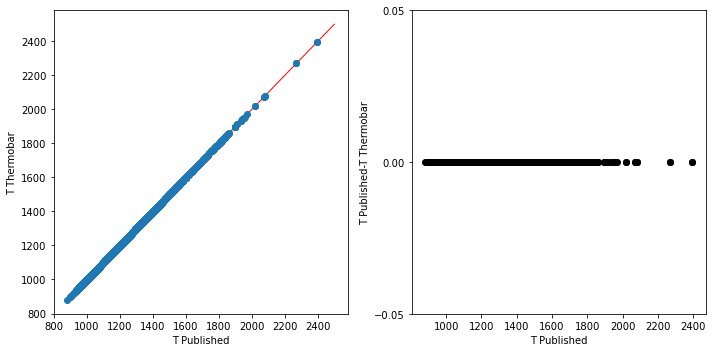

In [6]:

#Creating fig object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot([1000, 2500], [1000, 2500],color = 'r',linewidth = 1)



#plotting calculated vs read T_Ryan1996
ax1.plot(t_ext,T, 'o')

ax2.plot(t_ext, t_ext-T, 'ok')
ax2.set_yticks([-0.05, 0, 0.05])

ax1.set_ylabel('T Thermobar')
ax1.set_xlabel('T Published')


ax2.set_ylabel('T Published-T Thermobar')
ax2.set_xlabel('T Published')
fig.tight_layout()


## Calculating P from Ryan 1996

In [7]:
P = pt.calculate_gt_press(gt_comps = my_input_gt, equationP = 'P_Ryan1996', 
                        T = T)
P

0       21.997736
1       34.305015
2       35.574086
3       28.746510
4       22.092332
          ...    
5515    41.244365
5516    21.231356
5517    20.578851
5518    84.851620
5519    84.191790
Length: 5520, dtype: float64

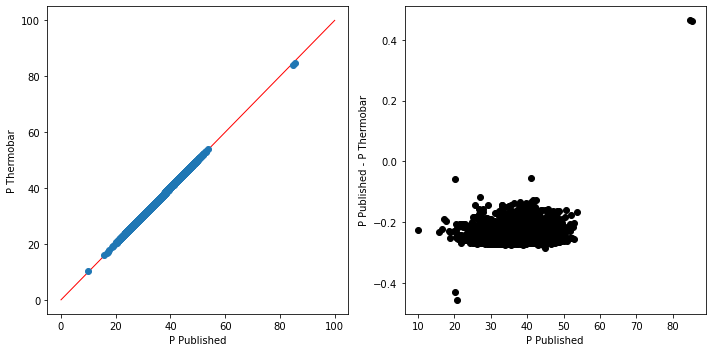

In [8]:

#Creating fig object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot([0, 100], [0, 100],color = 'r',linewidth = 1)



#plotting calculated vs read T_Ryan1996
ax1.plot(p_ext,P, 'o')

ax2.plot(p_ext, p_ext-P, 'ok')
#ax2.set_yticks([-0.05, 0, 0.05])

ax1.set_ylabel('P Thermobar')
ax1.set_xlabel('P Published')


ax2.set_ylabel('P Published - P Thermobar')
ax2.set_xlabel('P Published')
fig.tight_layout()


## Sudholz et al. 2021

In [9]:
#Loading data from Sudholz et al. (2021) for benchmarking tests of
#Sudholz2021 and Canil1999. This file consists both the solution and composition data
file_sudholz = "PT_Sudholz.xlsx"
data_sudholz = pt.import_excel(file_sudholz, sheet_name = "PT_Sudholz")
input_sudholz_ext = data_sudholz['my_input']

In [10]:
T2 = pt.calculate_gt_temp(gt_comps = input_sudholz_ext, equationT = 'T_Sudholz2021')


KeyError: 'Ca_MgFeCa'

In [ ]:
t_ext=input_sudholz_ext['T_Sudholz']+273.15
#Creating fig object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot([1000, 2500], [1000, 2500],color = 'r',linewidth = 1)



#plotting calculated vs read T_Ryan1996
ax1.plot(t_ext,T2, 'o')

ax2.plot(t_ext, t_ext-T2, 'ok')
ax2.set_yticks([-0.25, 0, 0.25])

ax1.set_ylabel('T Thermobar')
ax1.set_xlabel('T Published')


ax2.set_ylabel('T Published-T Thermobar')
ax2.set_xlabel('T Published')
fig.tight_layout()


## Canil et al. 1999

In [ ]:
T3 = pt.calculate_gt_temp(gt_comps = input_sudholz_ext, equationT = 'T_Canil1999')


In [ ]:
t_ext=input_sudholz_ext['T_Canil']+273
#Creating fig object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot([1000, 2500], [1000, 2500],color = 'r',linewidth = 1)



#plotting calculated vs read T_Ryan1996
ax1.plot(t_ext,T3, 'o')

ax2.plot(t_ext, t_ext-T3, 'ok')
ax2.set_yticks([-0.25, 0, 0.25])

ax1.set_ylabel('T Thermobar')
ax1.set_xlabel('T Published')


ax2.set_ylabel('T Published-T Thermobar')
ax2.set_xlabel('T Published')
fig.tight_layout()


## Example of plotting functions

In [ ]:
#These are not benchmarking tests but an example for plotting functions

#Recalculating T and P
T = pt.calculate_gt_temp(gt_comps = my_input_gt, 
        equationT = 'T_Ryan1996') #Calculating T_Ryan1996
P = pt.calculate_gt_press(gt_comps = my_input_gt, equationP = 'P_Ryan1996', 
                        T = T)

#Plotting garnet geotherm with BDTL and chosen geotherm of 37 mW/m^2
pt.plot_garnet_geotherm(gt_comps = my_input_gt, T_Ni = T, P_Cr = P, BDL_T = 1125,
 SHF_low = 35, SHF_high = 45, SHF_chosen = 37, max_depth = 300,
  temp_unit = 'Celsius', plot_type = 'show')



In [ ]:
my_input_gt = data['my_input']

In [ ]:
my_input_gt

WARNING
Na2O component is missing in some of the samples, diamondiferious classificatons might be wrong, defaulting to non-indicator classification. idx list: 
[185, 217, 2058, 2348, 2349, 2440, 2698, 2721, 2722, 2764, 2786, 2842, 2889, 2915, 2953, 2954, 3020, 3034, 3035, 3036, 3063, 3083, 3097, 3115, 3116, 3160, 3161, 3198, 3298, 3344, 3345, 3427, 3472, 3494, 3565, 3611, 3670, 3688, 3707, 3808, 3818, 3864, 3877, 3878, 3890, 3933, 3934, 3935, 3936, 3951, 3985, 3986, 4018, 4028, 4058, 4076, 4159, 4160, 4161, 4177, 4236, 4284, 4297, 4327, 4361, 4362, 4368, 4417, 4439, 4455, 4525, 4540, 4602, 4719, 5022, 5040, 5060, 5078, 5080, 5086, 5091, 5106, 5144, 5168, 5193, 5198, 5199, 5206, 5221, 5229, 5239, 5295, 5301, 5312, 5318, 5337, 5342, 5343, 5358, 5360, 5379, 5393, 5395, 5406, 5412, 5425, 5426, 5436, 5437, 5461, 5471, 5483]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


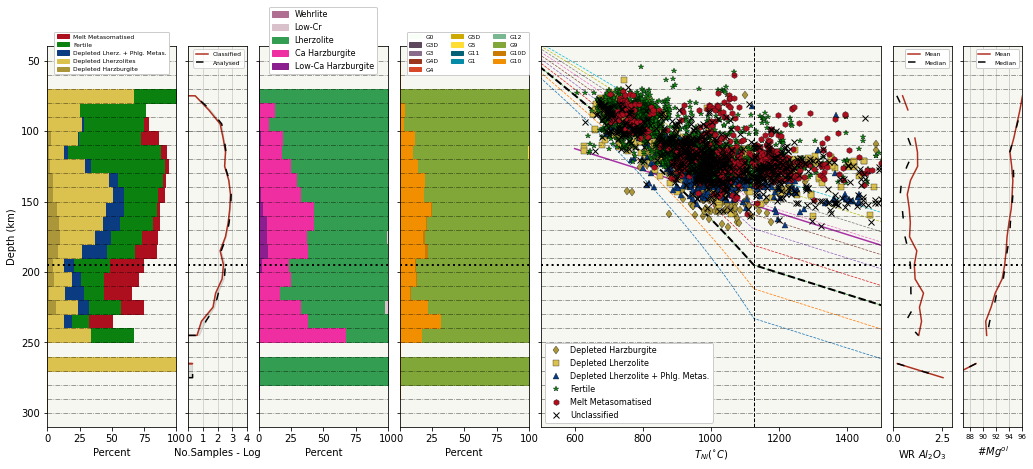

In [17]:
#Plotting the garnet composition of CARP, CaO-Cr2O3 and Grütter2003 classifications and projecting them unto the
#decided continental geotherm constructed with SHF_chosen and BDL_T.
#SHF_low and SHF_high are used to plot geotherms of all SHF values varying with 1 increments.
#Depth inverval is to slice up the mantle in kms when plotting compositional sections.
pt.plot_garnet_composition_section(gt_comps = my_input_gt, depth_interval = 10,
min_section_depth = 50, max_section_depth = 300, T_Ni = T, P_Cr = P, BDL_T = 1125,
 SHF_low = 35, SHF_high = 45, SHF_chosen = 37, temp_unit = 'Celsius',
 plot_type = 'show', filename_save = 'CARP_plot_2')
